# Data anonymisation of all things that need to be anonymised

# For government/public:
- sampleID
- untouched **gender**
- banded **birth year**
- banded **continent of birth**
- current country
- banded **region**
- weight
- banded height
- blood group letter
- untouched drinking
- untouched smoking
- banded education (UNSURE)
- banded countries visited
- cc status (UNSURE)


# For researchers:
- sampleID
- **gender**
- **birth year**
- **continent of birth**
- current country
- **region**
- OG weight
- OG height
- OG blood group
- OG level of drinking
- OG level of smoking
- banded education (UNSURE)
- **banded countries visited**
- cc status (UNSURE)

# Setting up

#### Importing libraries and packages

In [79]:
import random
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import datetime
import pycountry_convert as pc

#### Importing dataset

In [80]:
data = pd.read_csv('customer_information.csv')
data.head(10)

,given_name,surname,gender,birthdate,country_of_birth,current_country,phone_number,postcode,national_insurance_number,bank_account_number,cc_status,weight,height,blood_group,avg_n_drinks_per_week,avg_n_cigret_per_week,education_level,n_countries_visited
0,Lorraine,Reed,F,05/07/1984,Armenia,United Kingdom,(07700) 900876,LS5 8FN,ZZ 19 48 92 T,51157818,0,74.2,1.73,B+,6.5,218.8,phD,48
1,Edward,Williams,M,17/06/1997,Northern Mariana Islands,United Kingdom,(07700) 900 877,M0U 1RA,ZZ 753513 T,103328715,0,69.4,1.74,O-,0.7,43.6,primary,42
2,Hannah,Turner,F,15/06/1990,Venezuela,United Kingdom,+447700 900148,SO1 8HZ,ZZ 947196 T,69342327,0,98.6,1.88,B+,7.8,59.1,bachelor,9
3,Christine,Osborne,F,29/07/2000,Eritrea,United Kingdom,+447700 900112,B18 8LW,ZZ 39 69 47 T,85159170,0,62.0,1.56,O+,4.6,284.2,primary,32
4,Francesca,Yates,F,04/11/1968,Ecuador,United Kingdom,07700 900 413,TQ2 6BE,ZZ 30 98 91 T,11399166,0,96.3,1.81,A-,4.4,348.8,secondary,34
5,Joanne,Middleton,F,15/10/1963,Argentina,United Kingdom,+44(0)7700 900 032,CM7H 0XS,ZZ 141314 T,66208707,0,43.4,1.59,A-,5.7,219.3,other,7
6,Joel,Spencer,M,08/07/1982,Cook Islands,United Kingdom,(07700) 900579,L02 5WL,ZZ 97 20 76 T,108456420,0,77.5,1.55,B+,2.4,79.5,secondary,34
7,Leonard,Marshall,M,20/01/1987,Saint Vincent and the Grenadines,United Kingdom,07700 900508,CR3 5ZN,ZZ 599246 T,126109351,0,59.0,1.89,A+,8.4,48.0,other,24
8,Tracy,Smith,F,07/04/1999,Kiribati,United Kingdom,+447700 900 960,WR96 2TD,ZZ278789T,10754702,0,83.1,1.42,A+,1.2,148.1,secondary,17
9,Gavin,Kay,M,21/12/1998,Belize,United Kingdom,+44(0)7700900206,KT5A 0AW,ZZ 131934 T,52176102,0,80.0,1.74,A+,5.2,47.0,bachelor,47


#### Functions

In [81]:
# Function to see the number of counts in each unique category
def plot_category_counts(data, column_name, labels):
    # Count unique values in the specified column
    counts = data[column_name].value_counts()

    # Order the counts according to the provided labels
    counts_in_order = [counts[label] for label in labels]

    # Plotting
    plt.bar(labels, counts_in_order)
    plt.xlabel(column_name)
    plt.ylabel("Counts")
    plt.xticks(rotation=45)
    plt.show()

# Function to generate k-anonymity



# Anonymysing name into sampleID

In [82]:
def generate_sample_id(index):
    return f"sid_{str(index + 1).zfill(5)}"

data['sample_ID'] = data.index.to_series().apply(generate_sample_id)

# Banding education level

In [121]:
# Grouping Education level together
print(data['education_level'].value_counts())
data['education_level'].replace('other', 'pre-college and other', inplace = True)
data['education_level'].replace('primary', 'pre-college', inplace = True)
data['education_level'].replace('secondary', 'pre-college', inplace = True)
data['education_level'].replace('bachelor', 'college and above', inplace = True)
data['education_level'].replace('masters', 'college and above', inplace = True)
data['education_level'].replace('phD', 'college and above', inplace = True)


education_level
pre-college          519
college and above    373
other                108
Name: count, dtype: int64


# Banding birthdate into birth year bands

In [84]:
# Converting to birth years
birthDate = pd.to_datetime(data.birthdate, format='mixed')
data['birth_year'] = pd.DatetimeIndex(birthDate).year
data.head(10)

# Finding number of unique values per band
unique_birthdate_counts = data['birth_year'].value_counts()
unique_birthdate_counts

birth_year
1980    30
1957    28
1961    27
1962    27
1981    27
1983    26
1996    26
1978    26
1998    25
1963    25
1977    25
1994    25
1956    25
1989    25
1968    24
1971    24
1960    24
1997    22
1990    22
1958    21
1988    21
1967    21
1993    20
2002    20
1972    20
1964    20
1976    20
1973    20
1995    20
1986    19
1979    19
2001    19
1959    19
1975    18
1985    18
1987    18
1974    18
1970    18
1982    17
2003    16
2000    16
1992    15
1966    15
1969    15
1999    13
1984    12
1965    12
1991    12
1955     5
Name: count, dtype: int64

In [85]:
# Looking at min and max of birth year
min_birthyear = data['birth_year'].min() # 1955
max_birthyear = data['birth_year'].max() # 2003

# Creating groups with 10 - 15 years range
birthyear_bins = ["1955", "1970", "1980", "2005"]
birthyear_labels = ["1955-1969", "1970-1979", "1985-2005"]

# # Creating groups with 15 years range
# birthyear_bins = ["1955", "1970", "1985", "2005"]
# birthyear_labels = ["1955-1970", "1970-1985", "1985-2015"]

# # Creating groups with 20 years range
# birthyear_bins = ["1955", "1975", "1995", "2015"]
# birthyear_labels = ["1955-1975", "1975-1995", "1995-2015"]

# Banding heights into specified ranges
data['birth_year_ranges'] = pd.cut(data['birth_year'], bins=birthyear_bins, labels=birthyear_labels, right=False)

# Showing counts of height ranges
counts_birthyear = data['birth_year_ranges'].value_counts()
count_in_order_birthyear = [counts_birthyear[label] for label in birthyear_labels]
print(counts_birthyear)

birth_year_ranges
1985-2005    484
1955-1969    308
1970-1979    208
Name: count, dtype: int64


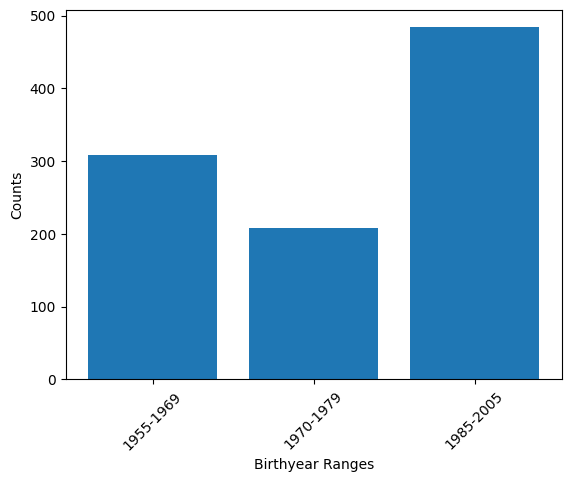

Number of unique birthyear categories: 3


In [86]:

# Plotting count of height ranges
plt.bar(birthyear_labels, count_in_order_birthyear)
plt.xlabel("Birthyear Ranges")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Finding the number of unique height categories
num_unique_birthyear_ranges = data['birth_year_ranges'].nunique()
print("Number of unique birthyear categories:", num_unique_birthyear_ranges)

# Banding country of birth into continents

In [87]:
# Dictionary to manually map countries that could not be mapped via pycountry_convert
continent_mapping = {
    'Korea': 'Asia',
    'Western Sahara': 'Africa',
    'Slovakia (Slovak Republic)': 'Europe',
    'Saint Barthelemy': 'North America',
    'Pitcairn Islands': 'Oceania',
    'Holy See': 'Europe',
    'Reunion': 'Africa',
    'United States Minor Outlying Islands': 'North America',
    'Antarctica (the territory South of 60 deg S)': 'Antarctica',
    'Svalbard & Jan Mayen Islands': 'Europe',
    'Bouvet Island (Bouvetoya)': 'Antarctica',
    'Saint Helena': 'Africa',
    "Cote d'Ivoire": 'Africa',
    'British Indian Ocean Territory (Chagos Archipelago)': 'Asia',
    'Palestinian Territory': 'Asia',
    'Libyan Arab Jamahiriya': 'Africa',
    'Timor-Leste': 'Asia',
    'Netherlands Antilles': 'North America',
    'Holy See (Vatican City State)': 'Europe'
}

# Function to map country to continent
def country_to_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        if country_name in continent_mapping:
            return continent_mapping[country_name]
        else:
            return 'Unknown'


In [88]:
# Applying the function to map the country to continent
data['continent_of_birth'] = data['country_of_birth'].apply(country_to_continent)
data.head(10)

# finding the number of unique continent
unique_continent_counts = data['continent_of_birth'].value_counts()
unique_continent_counts

continent_of_birth
Europe           228
Africa           225
Asia             206
North America    147
Oceania          117
South America     66
Antarctica        11
Name: count, dtype: int64

In [89]:
# Grouping Americas together and antarctica to oceania
data['continent_of_birth'].replace('Antarctica', 'Oceania', inplace = True)
data['continent_of_birth'].replace('South America', 'America', inplace = True)
data['continent_of_birth'].replace('North America', 'America', inplace = True)
data['continent_of_birth'].replace('Oceania', 'Asia', inplace = True)

# finding the number of unique continent
unique_continent_counts = data['continent_of_birth'].value_counts()
print(unique_continent_counts)

continent_of_birth
Asia       334
Europe     228
Africa     225
America    213
Name: count, dtype: int64


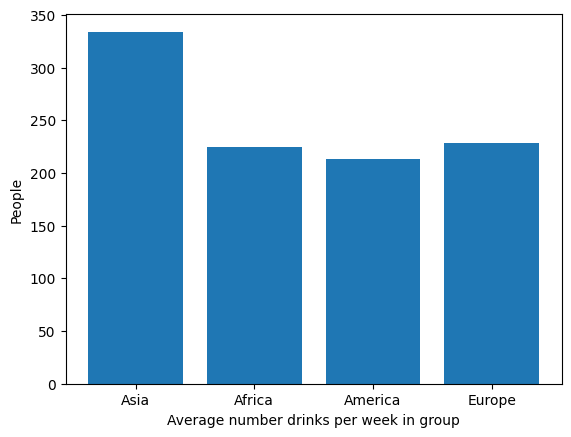

In [90]:
continent_labels = ["Asia", "Africa", "America", "Europe"]

continent_count_in_order = []
for i in continent_labels:
    continent_count_in_order.append(unique_continent_counts[i])

plt.bar(continent_labels, continent_count_in_order)
plt.xlabel("Average number drinks per week in group")
plt.ylabel("People")
plt.show()

# Banding postcode to region in UK

In [91]:
# Function to truncate postcode after the first numeric digit
def truncate_postcode(postcode):
    for i, char in enumerate(postcode):
        if char.isdigit():
            return postcode[:i]  # Truncate at the position of the first numeric digit
    return postcode  # Return the original postcode if no numeric digit is found

# Applying the function to create the postcode bands
data['postcode'] = data['postcode'].astype(str).apply(truncate_postcode)

# Print the updated DataFrame with the banded postcode column
print(data['postcode'])

# Find the number of unique postcodes and print
num_unique_postcodes = data['postcode'].nunique()
print("Number of unique postcodes:", num_unique_postcodes)

0      LS
1       M
2      SO
3       B
4      TQ
       ..
995    SA
996    TS
997     G
998    CT
999    SR
Name: postcode, Length: 1000, dtype: object
Number of unique postcodes: 124


In [92]:
# Importing postcode mapping to region
postcode_values = pd.read_excel('PostcodeRegions.xlsx')
postcode_values.head(10)

# Making it into a dictionary
postcode_dict = postcode_values.set_index('Postcode Area')['Region'].to_dict()

# Applying the mapping to the dataframe
data['Region'] = data['postcode'].map(postcode_dict)

# Find the number of unique regions and print
unique_regions_counts = data['Region'].value_counts()
unique_regions_counts

Region
Greater London      248
North West          184
Scotland            125
East Midlands        91
West Midlands        85
South East           72
South West           54
East of England      47
North East           43
Wales                30
Channel Islands      11
Northern Ireland      6
East England          3
Isle of Man           1
Name: count, dtype: int64

In [93]:
# Grouping to England and Other
data['Region'].replace('Greater London', 'England', inplace = True)
data['Region'].replace('North West', 'England', inplace = True)
data['Region'].replace('East Midlands', 'England', inplace = True)
data['Region'].replace('West Midlands', 'England', inplace = True)
data['Region'].replace('South East', 'England', inplace = True)
data['Region'].replace('South West', 'England', inplace = True)
data['Region'].replace('East of England', 'England', inplace = True)
data['Region'].replace('North East', 'England', inplace = True)
data['Region'].replace('East England', 'England', inplace = True)

data['Region'].replace('Scotland', 'Other', inplace = True)
data['Region'].replace('Wales', 'Other', inplace = True)
data['Region'].replace('Channel Islands', 'Other', inplace = True)
data['Region'].replace('Northern Ireland', 'Other', inplace = True)
data['Region'].replace('Isle of Man', 'Other', inplace = True)

# finding the number of unique regions
unique_region_counts = data['Region'].value_counts()
unique_region_counts

Region
England    827
Other      173
Name: count, dtype: int64

# Banding weight into ranges

In [94]:
# Before banding, determining range of weight by finding minimum and maximum values
min_weight = data['weight'].min() # 35.0
max_weight = data['weight'].max() # 100.0

print(f"Minimum weight: {min_weight}")
print(f"Maximum weight: {max_weight}")

Minimum weight: 35.0
Maximum weight: 100.0


weight_ranges
35-45     170
75-85     155
85-95     155
45-55     152
65-75     151
55-65     139
95-105     78
Name: count, dtype: int64


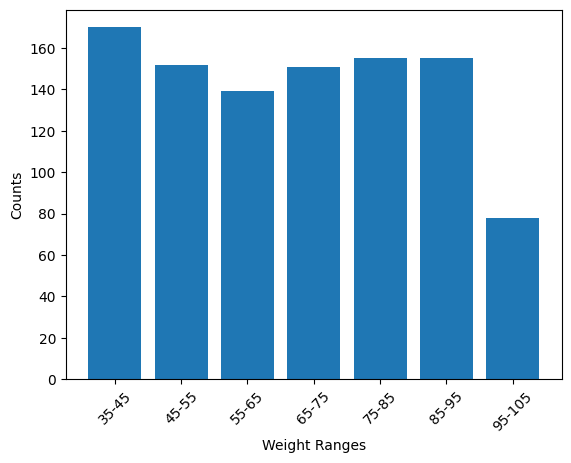

Number of unique weight ranges: 7


In [95]:
# Creating banding categories for weight with increments of 10 per category
weight_bins = [35, 45, 55, 65, 75, 85, 95, 105]
weight_labels = ["35-45", "45-55", "55-65", "65-75", "75-85", "85-95", "95-105"]  # Define labels for each bin
data["weight_ranges"] = pd.cut(data['weight'], bins=weight_bins, labels=weight_labels, right=False)

# Obtaining counts of weight ranges
counts_weight = data["weight_ranges"].value_counts()
count_in_order_weight = [counts_weight[label] for label in weight_labels]  # Corrected variable name
print(counts_weight)

# Plotting counts of weight ranges
plt.bar(weight_labels, count_in_order_weight)  # Corrected variable name
plt.xlabel("Weight Ranges")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Finding number of unique weight ranges
num_unique_weight_ranges = data['weight_ranges'].nunique()
print("Number of unique weight ranges:", num_unique_weight_ranges)

# Banding height into ranges

In [96]:
# Finding minimum and maximum heights
min_height = data['height'].min() # 1.4
max_height = data['height'].max() # 2.0

print(f"Minimum height: {min_height}")
print(f"Maximum height: {max_height}")

Minimum height: 1.4
Maximum height: 2.0


height_ranges
1.8-2.0    349
1.4-1.6    339
1.6-1.8    312
Name: count, dtype: int64


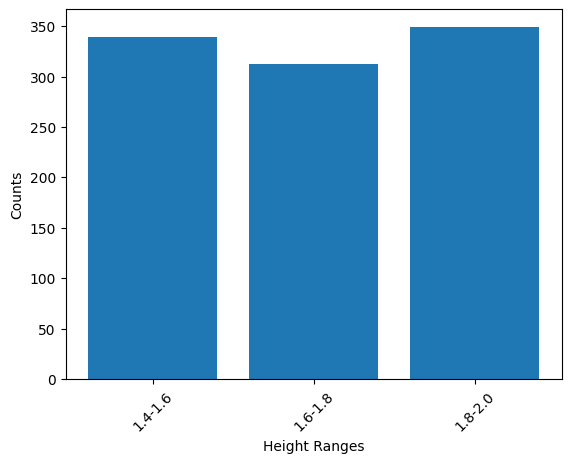

Number of unique height categories: 3


In [97]:
# Banding height into increments of 0.2
height_bins = [1.4, 1.6, 1.8, 2.1]  # Ranges for categories: 1.4-1.6, 1.6-1.8, 1.8-2.0 (adjust upper bound to include 2.0)
height_labels = ['1.4-1.6', '1.6-1.8', '1.8-2.0']  # Labels for the categories

# Banding heights into specified ranges
data['height_ranges'] = pd.cut(data['height'], bins=height_bins, labels=height_labels, right=False)

# Showing counts of height ranges
counts_height = data['height_ranges'].value_counts()
count_in_order_height = [counts_height[label] for label in height_labels]
print(counts_height)

# Plotting count of height ranges
plt.bar(height_labels, count_in_order_height)
plt.xlabel("Height Ranges")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

# Finding the number of unique height categories
num_unique_height_ranges = data['height_ranges'].nunique()
print("Number of unique height categories:", num_unique_height_ranges)

## Banding average number of drinking per week into categories

In [98]:
data["avg_n_drinks_per_week"].describe()

count    1000.000000
mean        4.765800
std         2.879831
min         0.000000
25%         2.300000
50%         4.600000
75%         7.400000
max        10.000000
Name: avg_n_drinks_per_week, dtype: float64

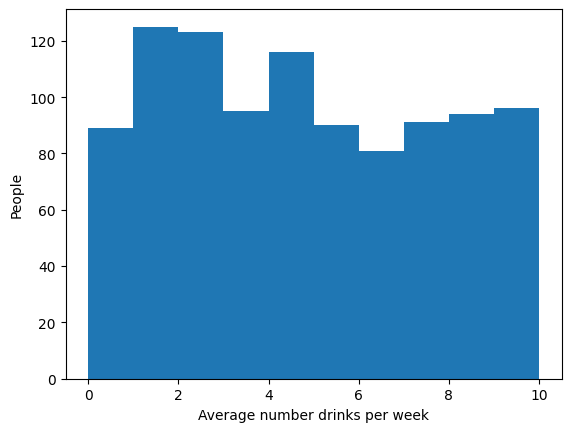

In [99]:
plt.hist(data["avg_n_drinks_per_week"])
plt.xlabel("Average number drinks per week")
plt.ylabel("People")
plt.show()

In [100]:
bins= [0,1,4,14]
labels = ["never", "light", "moderate"]
data["avg_n_drinks_per_week_group"] = pd.cut(data['avg_n_drinks_per_week'], bins=bins, labels=labels, right=False)

avg_n_drinks_per_week_group
moderate    568
light       343
never        89
Name: count, dtype: int64


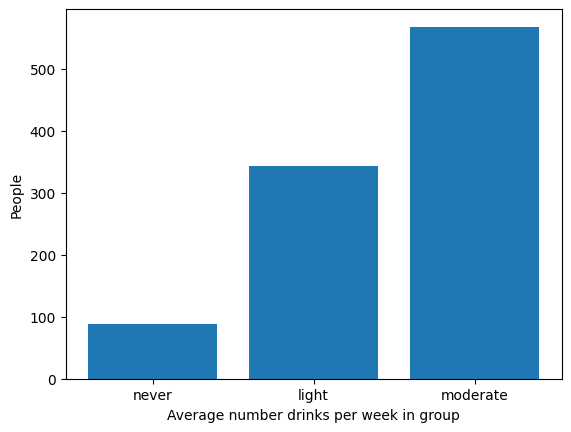

In [101]:
drinks_counts = data["avg_n_drinks_per_week_group"].value_counts()
drinks_count_in_order = []
for i in labels:
    drinks_count_in_order.append(drinks_counts[i])
print(drinks_counts)

plt.bar(labels, drinks_count_in_order)
plt.xlabel("Average number drinks per week in group")
plt.ylabel("People")
plt.show()

# Banding average cigarettes per week for government

In [102]:
data["avg_n_cigret_per_week"].describe()

count    1000.000000
mean      243.831400
std       146.405104
min         0.300000
25%       112.450000
50%       239.500000
75%       369.900000
max       500.000000
Name: avg_n_cigret_per_week, dtype: float64

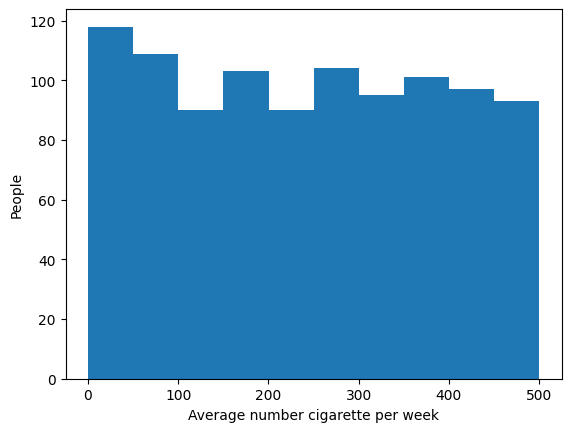

In [103]:
plt.hist(data["avg_n_cigret_per_week"])
plt.xlabel("Average number cigarette per week")
plt.ylabel("People")
plt.show()

In [104]:
bins= [0,200,400,600]
labels = ["light", "moderate", "heavy"]
data["avg_n_cigret_per_week_group"] = pd.cut(data['avg_n_cigret_per_week'], bins=bins, labels=labels, right=False)

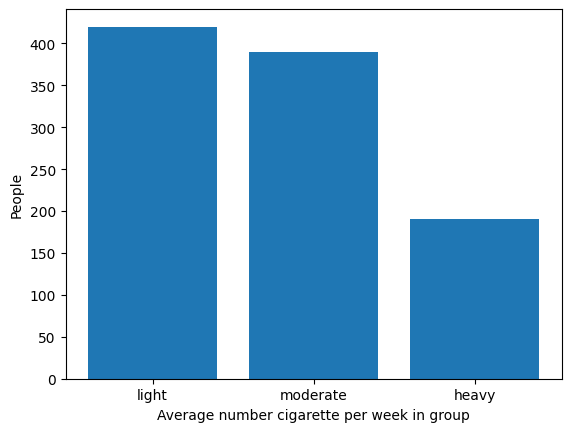

In [105]:
counts = data["avg_n_cigret_per_week_group"].value_counts()
count_in_order = []
for i in labels:
    count_in_order.append(counts[i])

plt.bar(labels, count_in_order)
plt.xlabel("Average number cigarette per week in group")
plt.ylabel("People")
plt.show()

# Banding countries visited

In [106]:
bins = list(range(0, max(data['n_countries_visited'])+1, 5))

labels = [f"{start + 1}-{end}" for start, end in zip(bins[:-1], bins[1:])]
print(labels)

# Create a new column n_countries_range with new bins
data['n_countries_range'] = pd.cut(data['n_countries_visited'], bins=bins, labels=labels, include_lowest=True)

# Count the occurrences in each bin and print it 
range_counts = data['n_countries_range'].value_counts()
print("Values in ranges of 5 and their counts:")
print(range_counts)

['1-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50']
Values in ranges of 5 and their counts:
n_countries_range
31-35    122
21-25    115
36-40    110
6-10     108
26-30    104
41-45    102
16-20     92
11-15     88
46-50     83
1-5       76
Name: count, dtype: int64


# Blood group

In [107]:
# Remove the '+' and '-' signs from the 'blood_group' column
data['blood_groupn'] = data['blood_group'].str.replace('+', '').str.replace('-', '')
data.head(10)

# checking number of unique values
unique_blood_group = data['blood_groupn'].value_counts()
unique_blood_group

blood_groupn
A     431
O     430
B     108
AB     31
Name: count, dtype: int64

# Final dataset for the government/public

In [108]:
# Order of columns:
cols_gov = ['sample_ID', 'gender','birth_year_ranges', 'continent_of_birth', 'current_country', 'Region', 'weight_ranges', 'height_ranges', 'blood_groupn', 'avg_n_drinks_per_week_group', 'avg_n_cigret_per_week_group', 'education_level', 'n_countries_range','cc_status']
cols_res = ['sample_ID', 'gender','birth_year_ranges', 'continent_of_birth', 'current_country', 'Region', 'weight', 'height', 'blood_group', 'avg_n_drinks_per_week', 'avg_n_cigret_per_week', 'education_level', 'n_countries_visited','cc_status']

In [109]:
# Generating final dataset for gov/public
final_data_gov = data[cols_gov]


In [110]:
# EXPORTING
final_data_gov.to_csv("final_data_gov.csv", index=False)

# Final dataset for researchers

In [111]:
# Generating final dataset for gov/public
final_data_res = data[cols_res]
final_data_res.head(10)

,sample_ID,gender,birth_year_ranges,continent_of_birth,current_country,Region,weight,height,blood_group,avg_n_drinks_per_week,avg_n_cigret_per_week,education_level,n_countries_visited,cc_status
0,sid_00001,F,1985-2005,Asia,United Kingdom,England,74.2,1.73,B+,6.5,218.8,college and above,48,0
1,sid_00002,M,1985-2005,Asia,United Kingdom,England,69.4,1.74,O-,0.7,43.6,pre-college,42,0
2,sid_00003,F,1985-2005,America,United Kingdom,England,98.6,1.88,B+,7.8,59.1,college and above,9,0
3,sid_00004,F,1985-2005,Africa,United Kingdom,England,62.0,1.56,O+,4.6,284.2,pre-college,32,0
4,sid_00005,F,1955-1969,America,United Kingdom,England,96.3,1.81,A-,4.4,348.8,pre-college,34,0
5,sid_00006,F,1955-1969,America,United Kingdom,England,43.4,1.59,A-,5.7,219.3,other,7,0
6,sid_00007,M,1985-2005,Asia,United Kingdom,England,77.5,1.55,B+,2.4,79.5,pre-college,34,0
7,sid_00008,M,1985-2005,America,United Kingdom,England,59.0,1.89,A+,8.4,48.0,other,24,0
8,sid_00009,F,1985-2005,Asia,United Kingdom,England,83.1,1.42,A+,1.2,148.1,pre-college,17,0
9,sid_00010,M,1985-2005,America,United Kingdom,England,80.0,1.74,A+,5.2,47.0,college and above,47,0


In [112]:
# EXPORTING
final_data_res.to_csv("final_data_res.csv", index=False)

# Calculating k-Anonymity

In [113]:
# # Quasi-identifiers for GOV/PUBLIC
# quasi_identifiers_gov = ['gender', 'birth_year_ranges', 'continent_of_birth', 'education_level','Region']

# def calculate_k_anonymity(data, identifiers):
#     # Group the data by the quasi-identifiers and count the occurrences
#     groups = data.groupby(identifiers).size()
#     # The k-anonymity is the smallest group size
#     k_anonymity = groups.min()
#     return k_anonymity

# # Assuming final_data_gov is your DataFrame and quasi_identifiers_gov is the list of quasi-identifiers.
# k_anonymity_value = calculate_k_anonymity(final_data_gov, quasi_identifiers_gov)

# # Now you can print or use k_anonymity_value
# print(f"The k-anonymity of the dataset is: {k_anonymity_value}")


In [114]:
# def find_unique_groups(final_data_gov, quasi_identifiers):
#     # Group the data by the quasi-identifiers and count the occurrences
#     groups = final_data_gov.groupby(quasi_identifiers).size()
#     # Find groups with only one record
#     unique_groups = groups[groups == 1]
#     return unique_groups

# # Example usage:
# unique_groups = find_unique_groups(final_data_gov, quasi_identifiers_gov)
# print("Unique groups based on quasi-identifiers:")
# print(unique_groups)


In [115]:
# # Quasi-identifiers for RESEARCHERS
# quasi_identifiers_res = ['gender', 'birth_year_ranges', 'continent_of_birth', 'Region']

# def calculate_k_anonymity(final_data_res, quasi_identifiers_res):
#     # Group the data by the quasi-identifiers and count the occurrences
#     groups = final_data_res.groupby(quasi_identifiers_res).size()
#     # The k-anonymity is the smallest group size
#     k_anonymity = groups.min()
#     return k_anonymity

# # Assuming final_data_gov is your DataFrame and quasi_identifiers_gov is the list of quasi-identifiers.
# k_anonymity_value = calculate_k_anonymity(final_data_res, quasi_identifiers_res)

# # Now you can print or use k_anonymity_value
# print(f"The k-anonymity of the dataset is: {k_anonymity_value}")


In [116]:
# def find_unique_groups(final_data_res, quasi_identifiers):
#     # Group the data by the quasi-identifiers and count the occurrences
#     groups = final_data_res.groupby(quasi_identifiers).size()
#     # Find groups with only one record
#     unique_groups = groups[groups == 1]
#     return unique_groups

# # Example usage:
# unique_groups = find_unique_groups(final_data_res, quasi_identifiers_res)
# print("Unique groups based on quasi-identifiers:")
# print(unique_groups)


# USE THIS INSTEAD

In [117]:
test = pd.read_csv('final_data_gov.csv')
test.head()

,sample_ID,gender,birth_year_ranges,continent_of_birth,current_country,Region,weight_ranges,height_ranges,blood_groupn,avg_n_drinks_per_week_group,avg_n_cigret_per_week_group,education_level,n_countries_range,cc_status
0,sid_00001,F,1985-2005,Asia,United Kingdom,England,65-75,1.6-1.8,B,moderate,moderate,college and above,46-50,0
1,sid_00002,M,1985-2005,Asia,United Kingdom,England,65-75,1.6-1.8,O,never,light,pre-college,41-45,0
2,sid_00003,F,1985-2005,America,United Kingdom,England,95-105,1.8-2.0,B,moderate,light,college and above,6-10,0
3,sid_00004,F,1985-2005,Africa,United Kingdom,England,55-65,1.4-1.6,O,moderate,moderate,pre-college,31-35,0
4,sid_00005,F,1955-1969,America,United Kingdom,England,95-105,1.8-2.0,A,moderate,moderate,pre-college,31-35,0


In [118]:
quasi_identifiers_gov = ['gender', 'birth_year_ranges', 'continent_of_birth', 'education_level','Region']
groups = test.groupby(quasi_identifiers_gov).size()
groups.min()

1

In [119]:
groups[groups == 1]

gender  birth_year_ranges  continent_of_birth  education_level    Region 
F       1955-1969          America             college and above  Other      1
                           Europe              other              Other      1
                                               pre-college        Other      1
        1970-1979          Africa              other              England    1
                                                                  Other      1
                           America             other              Other      1
                                               pre-college        Other      1
                           Asia                college and above  Other      1
        1985-2005          America             college and above  Other      1
                           Asia                other              Other      1
                           Europe              college and above  Other      1
                                               other     